### Jupyter Notebook para Análise de Dados da Câmara dos Deputados
##### Desenvolvido por: Glauco Júnior Carvalho

![widepay-banner](imagens/camara_dos_deputados.jpg)

### Resumo
#### Para apoiar a Câmara dos Deputados na redução de custos e melhorar o uso dos valores destinados aos gastos dos Parlamentares utilizaremos análise de dashboards e Machine Learning.

### Guia de Referência 1
<p> Este procedimento é para obtenção de dados via WEB Scrapping. </p>
<p> Para obter os dados compactados siga para o Guia de Referência 2. </p>

1. Web Scraping
2. Robots.txt
3. Selenium
4. Versão Python
5. Importação de Bibliotecas
6. Marca d'Água de Versões
7. ChromeDriver
8. Página Alvo
9. BeautifulSoup
10. Importação de Data Frame Scrapping

### 1. Web Scraping
<p> O Web Scraping ou (Raspagem WEB) é uma técnica para coleta e mineração de dados da WEB, o objetivo principal é estruturar os dados para colher insights importantes para tomadas de decisões eficientes. </p>

<p> É de fundamental importância verificar os termos de uso do(s) site(s) alvo, evitando violação de regras que causem impacto negativo. </p>

### 2. Robots.txt
<p> Robots.txt é um arquivo de configuração nos sites que controla o que pode ser indexado e/ou extraído pelos bots ou drivers de automação. </p>

<p> Para este projeto utilizaremos o site alvo: https://brasil.io para extração das informações da Câmara dos Deputados. </p>

<p> Realizaremos uma busca do arquivo de configuração no site alvo em: https://brasil.io/robots.txt, quando não há arquivo ou quando afirma acesso liberado podemos seguir com os drivers de automação para extração das informações. </p>

### 3. Selenium
<p> Selenium é uma ferramenta de automatização que permite realizar testes em ambientes de aplicações reais. </p>

<p> Faremos a instalação do Selenium via pip (gerenciador de pacotes Python). </p>

In [1]:
# Comando pip para instalação do Selenium.
!pip install -q selenium

### 4. Versão Python
<p> Para reproduzir os códigos deste projeto é importante utilizar a mesma versão que estamos utilizando neste laboratório. </p> 

In [2]:
# Verificando versão do Python
from platform import python_version
print("Neste laboratório estamos utilizando a versão do Python:", python_version())

Neste laboratório estamos utilizando a versão do Python: 3.7.6


### 5. Importação de Bibliotecas

In [3]:
# Comandos para importação
import bs4
import csv 
import selenium
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
from selenium import webdriver
import matplotlib.pyplot as plt
from collections import Counter

### 6. Marca d'Água de Versões
<p> Utilizaremos o pacote WaterMark para visualizarmos as versões dos pacotes que estamos utilizando neste laboratório. </p>

In [4]:
# Instalação e uso do pacote watermark.
!pip install -q -U watermark

%load_ext watermark
%watermark --iversions

bs4       : 4.8.2
numpy     : 1.18.1
pandas    : 1.0.1
selenium  : 3.141.0
csv       : 1.0
matplotlib: 3.1.3
seaborn   : 0.10.0



### 7. ChromeDriver
<p>  Utilizaremos o ChromeDriver como WebDriver deste projeto, é uma ferramenta open source para testes automatizados em páginas web. </p>

###### É necessário ir até o link abaixo, realizar o download do WebDriver e extrair para a pasta do projeto.
<p> https://chromedriver.chromium.org </p>

###### Obs. Note que será iniciada uma janela do navegador, não feche-a até a extração dos dados ser concluída.

In [5]:
# Criando o driver de conexão.
cdriver = webdriver.Chrome("./chromedriver")
cdriver.implicitly_wait(10) # 10 segundos

### 8. Página Alvo

In [6]:
 # Abrindo conexão com a página alvo e fazendo a busca.
cdriver.get("https://brasil.io/dataset/gastos-deputados/cota_parlamentar/")

In [7]:
 # Gravando as informações do scraping em uma variável.
dataset = cdriver.find_elements_by_id("gastos-deputados")

### 9. BeautifulSoup

<p> BeautifulSoup é um pacote Python para análise de documentos HTML e XML.</p>

In [8]:
# Passando valores do Scrapping para o Soup
for data in dataset:
    result_html = data.get_attribute('innerHTML')
    soup = BeautifulSoup(result_html, 'html.parser')

In [9]:
# Criaremos um arquivo para receber os dados do Web Scraping
arquivo = csv.writer(open('dados/scrap.csv', 'w', encoding = "utf-8"))

In [10]:
# Extraímos o cabeçalho da tabela e salvamos no nosso arquivo (título)
header = soup.find("thead")
header_elements = header.find_all("th")
header_elements = [head.text for head in header_elements[1:]]
arquivo.writerow(header_elements)

133

In [11]:
# Extraímos elemento de cada linha
elementos_linha = soup.find_all("tr")

In [12]:
# Agora extraímos o valor de cada linha e inserimos no nosso arquivo
for row in elementos_linha:
    data_elements = row.find_all("td")
    data_elements = [data.text for data in data_elements]
    arquivo.writerow(data_elements)

### 10. Importando DataFrame 
##### Nota! Caso dê problema na execução abaixo, execute novamente a linha de cima.

In [13]:
df_scrapping = pd.read_csv('dados/scrap.csv')

In [14]:
# Visualizando as 5 primeiras linhas do dataframe
df_scrapping.head(5)

,Mês,Data da Emissão,Parlamentar,Partido,UF,Descrição,CPF/CNPJ do Fornecedor,Fornecedor,Valor do Documento,Valor Glosa,Valor Líquido
2020,1,NaN,Norma Ayub,DEM,ES,TELEFONIA,6,RAMAL,0.30,0.0,0.30
2020,1,NaN,Fausto Pinato,PP,SP,TELEFONIA,6,RAMAL,2.36,0.0,2.36
2020,1,NaN,Iracema Portella,PP,PI,TELEFONIA,6,RAMAL,22.11,0.0,22.11
2020,1,NaN,Fábio Henrique,PDT,SE,TELEFONIA,6,RAMAL,26.39,0.0,26.39
2020,1,NaN,Bacelar,PODE,BA,TELEFONIA,6,RAMAL,10.68,0.0,10.68


### Guia de Referência 2
<p> Este passo é para obtenção de conjunto de dados via link. </p>
<p> Realizaremos na sequência a análise exploratória e estatística dos dados.</p>

1. Busca Conjunto de Dados WebLink
2. Importação de Dados
3. Análise Exploratória dos Dados

    3.1 Shape do DataFrame
    
    3.2 Colunas do DataFrame
    
    3.3 Tipos de Dados
    
    3.4 Colunas Duplicadas
    
    3.5 Percentual de Colunas NA
    
    
4. Análise Estatística dos Dados

    4.1 Distribuição dos Dados
    
    4.2 Resumos Estatísticos das Variáveis
    
    
5. Manipulando Estrutura do DataFrame

    5.1 Removendo Colunas NA
        
    
6. Visualização Dashboard

    6.1 Débito Cota Parlamentar
    
    6.2 Débito Cota por Estado
    
    6.3 Débito Cota por Partido
    
    6.4 Deputados por Partido
    
    6.5 Valor Líquido por Fornecedor
    
    6.6 Total Líquido Anual
    
    6.7 Total Líquido Mensal

### 1. Buscando Conjunto de Dados WebLink

In [15]:
# Script para buscar conjuto de dados pelo link
import requests

url = "https://data.brasil.io/dataset/gastos-deputados/cota_parlamentar.csv.gz"
filename = url.split("/")[-1]
with open(filename, "wb") as f:
    r = requests.get(url)
    f.write(r.content)

### 2. Importando Conjunto de Dados Compactado

In [16]:
# Importando conjunto de dados com Pandas
dataframe = pd.read_csv('cota_parlamentar.csv.gz', compression='gzip', error_bad_lines=False)
dataframe.head(5)

,codlegislatura,datemissao,idedocumento,idecadastro,indtipodocumento,nucarteiraparlamentar,nudeputadoid,nulegislatura,numano,numespecificacaosubcota,...,txtdescricao,txtdescricaoespecificacao,txtfornecedor,txtnumero,txtpassageiro,txttrecho,vlrdocumento,vlrglosa,vlrliquido,vlrrestituicao
0,56,2020-02-01 00:00:00,7007086,NaN,0,NaN,2442,2019,2020,0,...,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,CONTENT ASSESSORIA LTDA - ME,432,NaN,NaN,998.0,0.0,998.0,NaN
1,56,2020-02-13 00:00:00,7017162,NaN,4,NaN,2442,2019,2020,0,...,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,METROPOLE INTERATIVA INFORMATICA LTDA,46,NaN,NaN,4920.0,0.0,4920.0,NaN
2,56,2020-02-04 00:00:00,7007754,NaN,4,NaN,2442,2019,2020,0,...,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,AFC ALIMENTOS LTDA,306,NaN,NaN,511.0,0.0,511.0,NaN
3,56,2020-02-18 00:00:00,7018634,NaN,4,NaN,2442,2019,2020,0,...,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,AFC ALIMENTOS LTDA,311,NaN,NaN,186.0,0.0,186.0,NaN
4,56,2020-02-11 00:00:00,7011106,NaN,4,NaN,2442,2019,2020,0,...,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,23,NaN,NaN,740.0,0.0,740.0,NaN


### 3. Análise Exploratória dos Dados

#### 3.1 Shape do DataFrame

In [17]:
# Verificando tamanho do DataFrame
dataframe.shape

(3855649, 29)

#### 3.2 Colunas do DataFrame

In [18]:
# Conhecendo as colunas
dataframe.columns

Index(['codlegislatura', 'datemissao', 'idedocumento', 'idecadastro',
       'indtipodocumento', 'nucarteiraparlamentar', 'nudeputadoid',
       'nulegislatura', 'numano', 'numespecificacaosubcota', 'numlote',
       'nummes', 'numparcela', 'numressarcimento', 'numsubcota', 'sgpartido',
       'sguf', 'txnomeparlamentar', 'txtcnpjcpf', 'txtdescricao',
       'txtdescricaoespecificacao', 'txtfornecedor', 'txtnumero',
       'txtpassageiro', 'txttrecho', 'vlrdocumento', 'vlrglosa', 'vlrliquido',
       'vlrrestituicao'],
      dtype='object')

#### 3.3 Tipos de Dados

In [19]:
# Conhecendo os tipos de dados
dataframe.dtypes

codlegislatura                 int64
datemissao                    object
idedocumento                   int64
idecadastro                  float64
indtipodocumento               int64
nucarteiraparlamentar        float64
nudeputadoid                   int64
nulegislatura                  int64
numano                         int64
numespecificacaosubcota        int64
numlote                        int64
nummes                         int64
numparcela                     int64
numressarcimento             float64
numsubcota                     int64
sgpartido                     object
sguf                          object
txnomeparlamentar             object
txtcnpjcpf                     int64
txtdescricao                  object
txtdescricaoespecificacao     object
txtfornecedor                 object
txtnumero                     object
txtpassageiro                 object
txttrecho                     object
vlrdocumento                 float64
vlrglosa                     float64
v

#### 3.4 Colunas Duplicadas

In [20]:
 # Verificando se possui colunas duplicadas
col_unique = []
col_names = [col_unique.append(x) for x in dataframe.columns if x not in col_unique]
print("Colunas únicas:", len(col_unique), "Total Colunas", len(dataframe.axes[1]))

Colunas únicas: 29 Total Colunas 29


#### 3.5 Percentual de Colunas NA

In [21]:
# Verificando Porcentagem de Valores NA
(dataframe.isnull().sum(axis = 0) / len(dataframe.axes[0])) * 100

codlegislatura                0.000000
datemissao                    4.941970
idedocumento                  0.000000
idecadastro                   0.142778
indtipodocumento              0.000000
nucarteiraparlamentar         0.142596
nudeputadoid                  0.000000
nulegislatura                 0.000000
numano                        0.000000
numespecificacaosubcota       0.000000
numlote                       0.000000
nummes                        0.000000
numparcela                    0.000000
numressarcimento             55.032318
numsubcota                    0.000000
sgpartido                     0.000000
sguf                          0.142778
txnomeparlamentar             0.000000
txtcnpjcpf                    0.000000
txtdescricao                  0.000000
txtdescricaoespecificacao    79.648459
txtfornecedor                 0.000233
txtnumero                     0.000233
txtpassageiro                74.277975
txttrecho                    73.958548
vlrdocumento             

### 4. Análise Estatística dos Dados

#### 4.1 Distribuição dos Dados

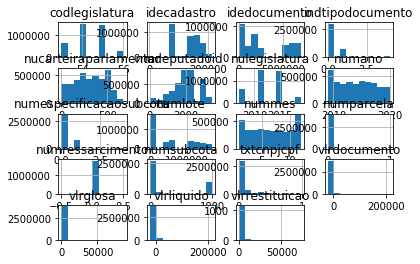

In [22]:
#Verificando distribuição dos dados
dataframe.hist()
plt.show()
plt.rcParams["figure.figsize"] = (20,20)

#### 4.2 Resumos Estatísticos das Variáveis

In [23]:
# Conhecendo os resumos estatísticos das variáveis
dataframe.describe()

,codlegislatura,idedocumento,idecadastro,indtipodocumento,nucarteiraparlamentar,nudeputadoid,nulegislatura,numano,numespecificacaosubcota,numlote,nummes,numparcela,numressarcimento,numsubcota,txtcnpjcpf,vlrdocumento,vlrglosa,vlrliquido,vlrrestituicao
count,3.855649e+06,3.855649e+06,3.850144e+06,3.855649e+06,3.850151e+06,3.855649e+06,3.855649e+06,3.855649e+06,3.855649e+06,3.855649e+06,3.855649e+06,3.855649e+06,1733796.0,3.855649e+06,3.855649e+06,3.855632e+06,3.855649e+06,3.855649e+06,1150.000000
mean,5.435852e+01,2.729065e+06,1.286019e+05,3.411021e-01,3.146683e+02,1.974208e+03,2.012434e+03,2.013999e+03,2.209231e-01,5.622804e+05,6.574990e+00,1.758459e-04,0.0,2.668642e+02,1.108942e+13,5.505108e+02,4.765311e+00,5.444028e+02,962.241861
std,8.426546e-01,2.533703e+06,4.413991e+04,8.083297e-01,1.657848e+02,7.552428e+02,3.370618e+00,3.023998e+00,4.899672e-01,5.940902e+05,3.310913e+00,1.325953e-02,0.0,4.295009e+02,1.888940e+13,1.955870e+03,1.384766e+02,1.935002e+03,2986.046729
min,5.300000e+01,0.000000e+00,3.151000e+03,0.000000e+00,1.000000e+00,1.200000e+01,2.007000e+03,2.009000e+03,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.0,1.000000e+00,0.000000e+00,-2.097470e+04,0.000000e+00,-2.097470e+04,1.000000
25%,5.400000e+01,0.000000e+00,7.439500e+04,0.000000e+00,1.830000e+02,1.552000e+03,2.011000e+03,2.011000e+03,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.0,3.000000e+00,5.212940e+11,4.088000e+01,0.000000e+00,4.019000e+01,43.190000
50%,5.400000e+01,1.786225e+06,1.414780e+05,0.000000e+00,3.160000e+02,1.926000e+03,2.011000e+03,2.014000e+03,0.000000e+00,4.564800e+05,7.000000e+00,0.000000e+00,0.0,1.100000e+01,4.061928e+12,1.280000e+02,0.000000e+00,1.263100e+02,118.565000
75%,5.500000e+01,5.595603e+06,1.606390e+05,0.000000e+00,4.630000e+02,2.393000e+03,2.015000e+03,2.016000e+03,0.000000e+00,1.165132e+06,9.000000e+00,0.000000e+00,0.0,9.990000e+02,9.296295e+12,4.378025e+02,0.000000e+00,4.335300e+02,375.970000
max,5.600000e+01,7.033421e+06,2.132740e+05,4.000000e+00,6.740000e+02,3.466000e+03,2.019000e+03,2.020000e+03,4.000000e+00,1.685002e+06,1.200000e+01,1.000000e+00,0.0,9.990000e+02,9.874986e+13,2.150000e+05,8.600000e+04,2.150000e+05,73200.000000


### 5. Manipulando Estrutura do DataFrame

#### 5.1 Removendo Colunas NA

In [24]:
# Removendo Colunas com mais de 50% valores NA
del dataframe['numressarcimento']
del dataframe['txtdescricaoespecificacao']
del dataframe['txtpassageiro']
del dataframe['txttrecho']
del dataframe['vlrrestituicao']

# Removendo demais valores NA (menos de 1.5% não afetam nossa análise)
dataframe = dataframe.dropna()

### 6. Visualização Dashboard

#### 6.1 Débito Cota Parlamentar

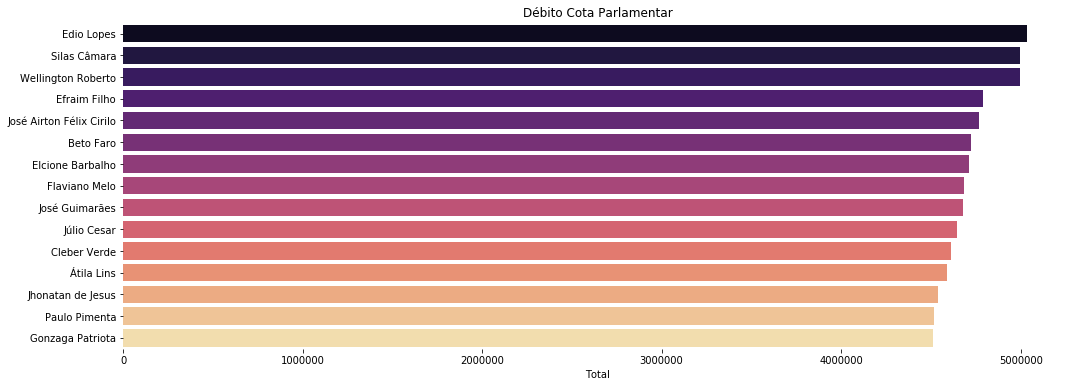

In [25]:
# Análise Débito Cota Parlamentar
debito_cota = dataframe.groupby(by=["idecadastro", "txnomeparlamentar"])['vlrliquido'].sum().to_frame('total_debitado').sort_values('total_debitado', ascending = False).reset_index()
debito_cota = debito_cota.head(15)

# Inicializando a figura do gráfico.
f, ax = plt.subplots(figsize=(17,6))

# Plotando gráfico.
sns.barplot(x="total_debitado", y="txnomeparlamentar", data=debito_cota, palette="magma")

ax.set(title="Débito Cota Parlamentar", ylabel ="", xlabel = "Total")
sns.despine(left=True, bottom=True)

#### 6.2 Débito Cota por Estado

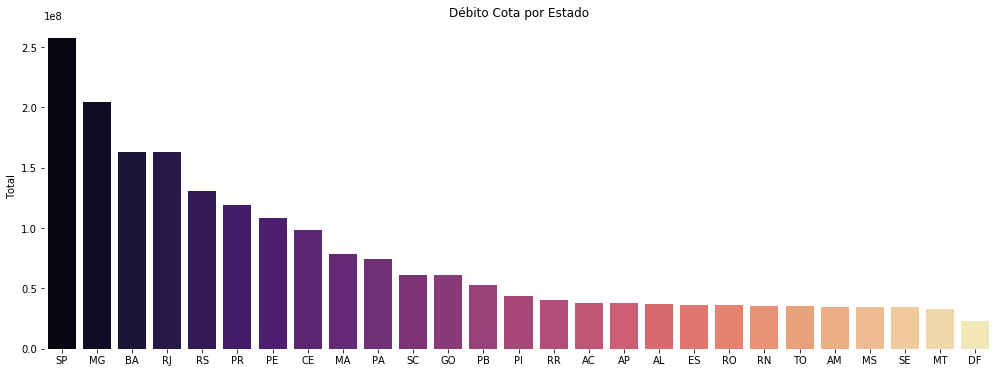

In [26]:
# Análise Débito Cota por Estado
debito_cota_uf = dataframe.groupby(by=["sguf"])['vlrliquido'].sum().to_frame('total_debitado_uf').sort_values('total_debitado_uf', ascending = False).reset_index()

# Inicializando a figura do gráfico.
f, ax = plt.subplots(figsize=(17,6))

# Plotando gráfico.
sns.barplot(x="sguf", y="total_debitado_uf", data=debito_cota_uf, palette="magma")

ax.set(title="Débito Cota por Estado", ylabel ="Total", xlabel = "")
sns.despine(left=True, bottom=True)

#### 6.3 Débito Cota por Partido

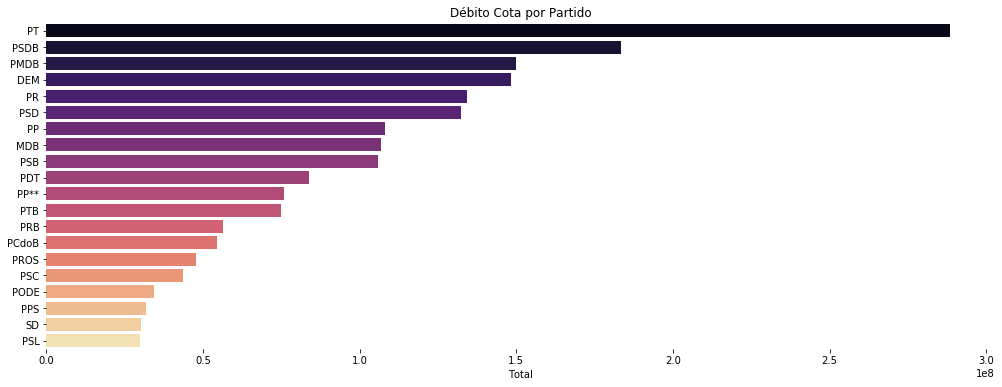

In [27]:
# Análise Débito Cota por Partido
debito_cota_partido = dataframe.groupby(by=["sgpartido"])['vlrliquido'].sum().to_frame('total_debitado_partido').sort_values('total_debitado_partido', ascending = False).reset_index()
debito_cota_partido = debito_cota_partido.head(20)

# Inicializando a figura do gráfico.
f, ax = plt.subplots(figsize=(17,6))

# Plotando gráfico.
sns.barplot(x="total_debitado_partido", y="sgpartido", data=debito_cota_partido, palette="magma")

ax.set(title="Débito Cota por Partido", ylabel ="", xlabel = "Total")
sns.despine(left=True, bottom=True)

#### 6.4 Deputados por Partido

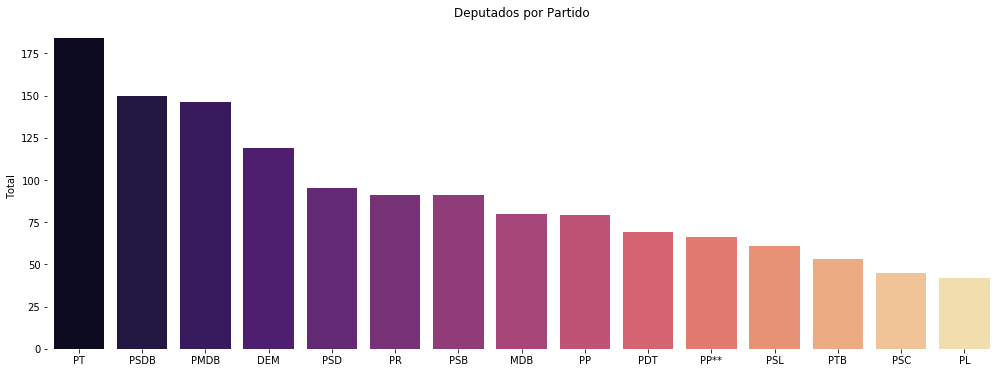

In [28]:
# Análise Deputados por Partido
total_deputado_partido = dataframe.groupby(by=["sgpartido"])['idecadastro'].nunique().to_frame('total_deputado_partido').sort_values('total_deputado_partido', ascending = False).reset_index()
total_deputado_partido = total_deputado_partido.head(15)

# Inicializando a figura do gráfico.
f, ax = plt.subplots(figsize=(17,6))

# Plotando gráfico.
sns.barplot(x="sgpartido", y="total_deputado_partido", data=total_deputado_partido, palette="magma")

ax.set(title="Deputados por Partido", ylabel ="Total", xlabel = "")
sns.despine(left=True, bottom=True)

#### 6.5 Valor Líquido por Fornecedor

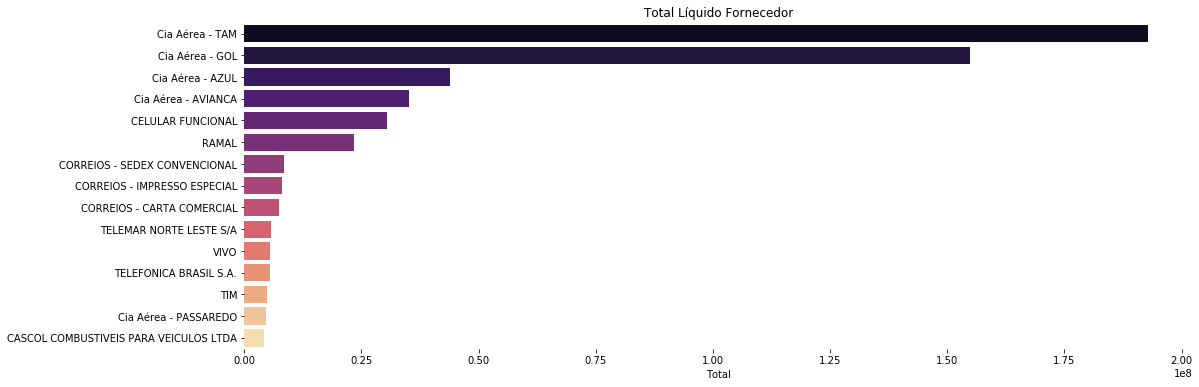

In [29]:
# Análise Valor Líquido por Fornecedor
total_liquido_fornec = dataframe.groupby(by=["txtfornecedor"])['vlrliquido'].sum().to_frame('total_liquido_fornec').sort_values('total_liquido_fornec', ascending = False).reset_index()
total_liquido_fornec = total_liquido_fornec.head(15)

# Inicializando a figura do gráfico.
f, ax = plt.subplots(figsize=(17,6))

# Plotando gráfico.
sns.barplot(x="total_liquido_fornec", y="txtfornecedor", data=total_liquido_fornec, palette="magma")

ax.set(title="Total Líquido Fornecedor", ylabel ="", xlabel = "Total")
sns.despine(left=True, bottom=True)

#### 6.6 Total Líquido Anual

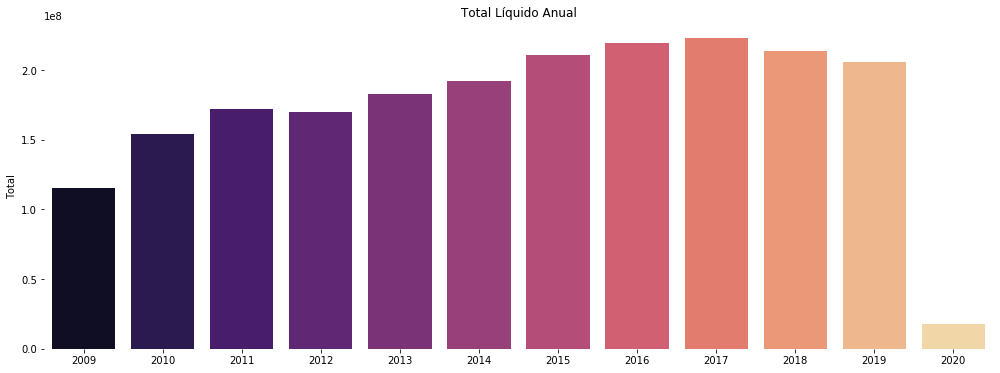

In [30]:
# Análise Total Líquido Anual
total_liquido_anual = dataframe.groupby(by=["numano"])['vlrliquido'].sum().to_frame('total_liquido_anual').sort_values('numano', ascending = True).reset_index()

# Inicializando a figura do gráfico.
f, ax = plt.subplots(figsize=(17,6))

# Plotando gráfico.
sns.barplot(x="numano", y="total_liquido_anual", data=total_liquido_anual, palette="magma")

ax.set(title="Total Líquido Anual", ylabel ="Total", xlabel = "")
sns.despine(left=True, bottom=True)

#### 6.7 Total Líquido Mensal

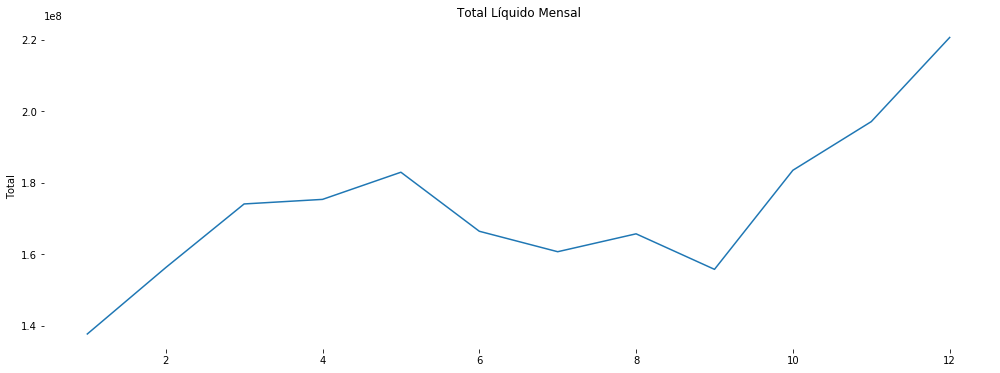

In [31]:
# Análise Total Líquido Mensal
total_liquido_mensal = dataframe.groupby(by=["nummes"])['vlrliquido'].sum().to_frame('total_liquido_mensal').sort_values('nummes', ascending = True).reset_index()

# Inicializando a figura do gráfico.
f, ax = plt.subplots(figsize=(17,6))

# Plotando gráfico.
sns.lineplot(x="nummes", y="total_liquido_mensal", data=total_liquido_mensal, palette="magma")

ax.set(title="Total Líquido Mensal", ylabel ="Total", xlabel = "")
sns.despine(left=True, bottom=True)

### Guia de Referência 3

<p> Neste guia realizaremos a aplicação de Machine Learning para filtrar as variáveis mais importantes para análise e utilizaremos técnicas e algoritmos para prever se as despesas vão ultrapassar a média de despesas com parlamentares. </p>

1. Importação de Bibliotecas Machine Learning
2. Variável Alvo
3. Amostra 20% DataFrame
4. Variáveis Preditoras e Variável Alvo
5. Tipo de Dados
6. Removendo Variáveis Correlatas
7. Shape DataFrame Preditor
8. Normalização
    8.1 Normalização com MinMaxScaler
    8.2 Normalização com Normalizer
9. Análise preditiva com dados pré-processados
    9.1 Análise Preditiva Normalização (MinMaxScaler)
    9.2 Análise Preditiva Normalização (Normalizer)
10. Conclusão

### 1. Importação de Bibliotecas Machine Learning

In [32]:
# Importando bibliotecas de Machine Learning
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import utils

import warnings
warnings.filterwarnings("ignore")

### 2. Variável Alvo

In [33]:
# Função para saber valor médio gasto
media_vlrliquido = dataframe['vlrliquido'].mean()

# Criando variável ALVO binária (0 não passa da média | 1 passa da média)
dataframe['ALVO'] = [1 if x > media_vlrliquido else 0 for x in dataframe['vlrliquido']]

### 3. Amostra 20% DataFrame
<p> Para poupar tempo de processamento e ser reproduzível mesmo quando o recurso computacional for baixo utilizaremos a divisão dos dados com o princípio de pareto, onde afirma que 80% dos efeitos vêm de 20% das causas. </p>

In [34]:
# Obtendo uma amostra randômica com 20% do DataFrame
## Declarando um valor de seed para utilizar os mesmos valores randômicos
seed = 2021
amostra_dataframe = dataframe.sample(frac=0.2, replace=True, random_state=seed)
amostra_dataframe.shape

(731913, 25)

### 4. Variáveis Preditoras e Variável Alvo

In [35]:
# Separando nosso conjunto de dados em variáveis preditores e variável ALVO
X = amostra_dataframe.drop(['ALVO'], axis = 1)
y = amostra_dataframe['ALVO']

### 5. Tipo de Dados

In [36]:
# Verificando tipo de dados das variáveis preditoras
X.dtypes

codlegislatura               int64
datemissao                  object
idedocumento                 int64
idecadastro                float64
indtipodocumento             int64
nucarteiraparlamentar      float64
nudeputadoid                 int64
nulegislatura                int64
numano                       int64
numespecificacaosubcota      int64
numlote                      int64
nummes                       int64
numparcela                   int64
numsubcota                   int64
sgpartido                   object
sguf                        object
txnomeparlamentar           object
txtcnpjcpf                   int64
txtdescricao                object
txtfornecedor               object
txtnumero                   object
vlrdocumento               float64
vlrglosa                   float64
vlrliquido                 float64
dtype: object

### 6. Removendo Variáveis Correlatas

In [37]:
# Removendo variáveis String
del X['sgpartido']
del X['sguf']
del X['txnomeparlamentar']
del X['txtdescricao']
del X['txtfornecedor']
del X['txtnumero']
del X['vlrliquido']
del X['datemissao']

### 7. Shape DataFrame Preditor

In [38]:
# Verificando shape do dataframe das variáveis preditoras
X.shape

(731913, 16)

### 8. Normalização

<p> Quando os nossos dados estão em escalas diferentes o algoritmo pode não obter o melhor resultado, sendo necessário muitas vezes normalizar ou padronizar. </p>

<p> Normalização e Padronização tem objetivo semelhante, ambas servem para transformar os dados para mesma grandeza, porém o resultado da padronização é média = 0 e desvio padrão igual a 1. </p>
    
<p> Utilizaremos as funções do Sklearn para normalizar os nossos dados e realizar testes com modelos preditivos. </p>

#### 8.1 Normalização com MinMaxScaler

In [39]:
# Normalizando dados com MinMaxScaler

# Escala
scaler = MinMaxScaler(feature_range = (0, 1))

# Aplicando modelo para reescala
X_minmaxscaler = scaler.fit_transform(X)

#### 8.2 Normalização com Normalizer

In [40]:
# Normalizando dados com Normalizer
scaler = Normalizer().fit(X)
X_normalizer = scaler.transform(X)

### 9. Análise preditiva com dados pré-processados

In [41]:
# Criando um dataframe para receber o resultado da predição com dados pré-processados
resultados_default = pd.DataFrame(columns=['Algoritmo', 'Acuracia'])

# Lista de modelos
models = []
models.append(("Regressao Log.",LogisticRegression()))
models.append(("Gauss",GaussianNB()))
models.append(("Linear Disc.", LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestRegressor(n_estimators=10)))
models.append(("Decision Tree",DecisionTreeRegressor()))
models.append(("KNN",KNeighborsRegressor()))

num_folds = 3
seed = 2021

# Estrutura de repetição para coletar a acurácia de cada modelo
for name,model in models:
    kfold = KFold(num_folds, True, random_state = seed)
    cv_result = cross_val_score(model, X, y, cv=kfold)
    resultados_default = resultados_default.append({'Algoritmo': name, 'Acuracia':cv_result.mean() * 100}, ignore_index=True)

In [42]:
# Verificando acurácia dos modelos
resultados_default

,Algoritmo,Acuracia
0,Regressao Log.,78.770564
1,Gauss,78.770564
2,Linear Disc.,85.894772
3,Random Forest,99.742633
4,Decision Tree,99.584685
5,KNN,62.319270


#### 9.1 Análise Preditiva Normalização (MinMaxScaler)

In [43]:
# Criando um dataframe para receber o resultado da predição com dados normalizados com MinMaxScaler
resultados_minmaxscaler = pd.DataFrame(columns=['Algoritmo', 'Acuracia'])

# Lista de modelos
models = []
models.append(("Regressao Log.",LogisticRegression()))
models.append(("Gauss",GaussianNB()))
models.append(("Linear Disc.", LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestRegressor(n_estimators=10)))
models.append(("Decision Tree",DecisionTreeRegressor()))
models.append(("KNN",KNeighborsRegressor()))

num_folds = 3
seed = 2021

# Estrutura de repetição para coletar a acurácia de cada modelo
for name,model in models:
    kfold = KFold(num_folds, True, random_state = seed)
    cv_result = cross_val_score(model, X_minmaxscaler, y, cv=kfold)
    resultados_minmaxscaler = resultados_minmaxscaler.append({'Algoritmo': name, 'Acuracia':cv_result.mean() * 100}, ignore_index=True)

In [44]:
# Verificando acurácia dos modelos
resultados_minmaxscaler

,Algoritmo,Acuracia
0,Regressao Log.,89.062634
1,Gauss,91.441469
2,Linear Disc.,85.894772
3,Random Forest,99.746291
4,Decision Tree,99.577544
5,KNN,17.920244


#### 9.2 Análise Preditiva Normalização (Normalizer)

In [45]:
# Criando um dataframe para receber o resultado da predição com dados normalizados com Normalizer
resultados_normalizer = pd.DataFrame(columns=['Algoritmo', 'Acuracia'])

# Lista de modelos
models = []
models.append(("Regressao Log.",LogisticRegression()))
models.append(("Gauss",GaussianNB()))
models.append(("Linear Disc.", LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestRegressor(n_estimators=10)))
models.append(("Decision Tree",DecisionTreeRegressor()))
models.append(("KNN",KNeighborsRegressor()))

num_folds = 3
seed = 2021

# Estrutura de repetição para coletar a acurácia de cada modelo
for name,model in models:
    kfold = KFold(num_folds, True, random_state = seed)
    cv_result = cross_val_score(model, X_normalizer, y, cv=kfold)
    resultados_normalizer = resultados_normalizer.append({'Algoritmo': name, 'Acuracia':cv_result.mean() * 100}, ignore_index=True)

In [46]:
# Verificando acurácia dos modelos
resultados_normalizer

,Algoritmo,Acuracia
0,Regressao Log.,78.789556
1,Gauss,34.904422
2,Linear Disc.,78.829041
3,Random Forest,9.851503
4,Decision Tree,9.436656
5,KNN,42.452675


### 10. Conclusão

1. O parlamentar que tem maior débito na cota é o Edio Lopes;
2. São Paulo é o estado que tem maior gasto com Deputados;
3. O partido dos trabalhadores (PT) é o partido que tem mais Deputados e por consequência é o que tem maior gasto;
4. A maior parte das despesas dos Deputados são com Companhias Aéreas;
5. De 2018 até hoje as despesas com parlamentares teve uma queda significativa;
6. O mês de dezembro é o que tem maior custo com parlamentares, é justificado pelas despesas com férias e viagens;


#### Modelos Preditivos
<p> Apesar de termos utilizado técnicas para normalização de dados, a análise preditiva com o algoritmo Random Foreste e dados pré-processados foi o que obteve uma acurácia melhor (99.74%), fator que é explicado pela atenção no tratamento dos dados, substituição de valores nulos e engenharia de atributos para as variáveis preditoras. </p>

<p> Utilizamos o modelo para prever se as despesas serão superiores aos valores gastos em média, insight importante para antecipar a liberação de recursos e cortar gastos com as despesas desnecessárias. </p>

<p> Utilizaremos uma aplicação Laravel para visualizarmos os insights obtidos com as análises de visualização de Dashboard. </p>

# Bônus - Extra
#### Salvar resultados em banco de dados MySQL para consumir em uma WebApp Laravel.

In [47]:
# Instalando Conector Python via Pip
!pip install mysql-connector-python

In [ ]:
# Importando biblioteca sqlalchemy
import sqlalchemy

#Configurações do banco de dados
database_username = '{SEU_USERNAME}'
database_password = '{SUA_SENHA}'
database_ip       = '{SEU_IP}'
database_name     = '{SEU_BANCO}'

# Abrindo conexão com DB
database_connection = sqlalchemy.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.
                                               format(database_username, database_password, 
                                                      database_ip, database_name))

# Informações de Dashboards
debito_cota.to_sql(con=database_connection, name='debito_cota_parlamentar', if_exists='replace')
debito_cota_uf.to_sql(con=database_connection, name='debito_cota_uf', if_exists='replace')
debito_cota_partido.to_sql(con=database_connection, name='debito_cota_partido', if_exists='replace')
total_deputado_partido.to_sql(con=database_connection, name='total_deputado_partido', if_exists='replace')
total_liquido_fornec.to_sql(con=database_connection, name='total_liquido_fornec', if_exists='replace')
total_liquido_anual.to_sql(con=database_connection, name='total_liquido_anual', if_exists='replace')
total_liquido_mensal.to_sql(con=database_connection, name='total_liquido_mensal', if_exists='replace')

# Análises de Algoritmos
resultados_default.to_sql(con=database_connection, name='resultados_default', if_exists='replace')
resultados_minmaxscaler.to_sql(con=database_connection, name='resultados_minmaxscaler', if_exists='replace')
resultados_normalizer.to_sql(con=database_connection, name='resultados_normalizer', if_exists='replace')

In [ ]:
# Criando arquivo DUMP do banco de dados
mysqldump -u root -p camara_deputados_analytics > camara_deputados_analytics.sql